# Using Bokeh to create an interactive visualisation of avocado prices
Data visualisation project mapping price data for avocados onto a map of the USA.

There is an accompanying [article]((https://towardsdatascience.com/creating-an-interactive-map-in-python-using-bokeh-and-pandas-f84414536a06)) on [Towards Data Science](https://towardsdatascience.com/) to walk you through this visualisation [here](https://towardsdatascience.com/creating-an-interactive-map-in-python-using-bokeh-and-pandas-f84414536a06).

This is a follow-up to this [article](https://towardsdatascience.com/mapping-avocado-prices-in-python-with-geopandas-geopy-and-matplotlib-c7e0ef08bc26) on [Towards Data Science](https://towardsdatascience.com/mapping-avocado-prices-in-python-with-geopandas-geopy-and-matplotlib-c7e0ef08bc26), the code and data for which are stored in [this repository](https://github.com/thecraigd/Avocado-Prices). 

My objective here was to produce an interactive version of the [static visualisation](https://github.com/thecraigd/Avocado-Prices/blob/master/img/Avocado_Prices_Display.jpg) I produced previously. I used [Bokeh](https://docs.bokeh.org/en/latest/index.html) to do that, and produced [this visualisation](http://www.craigdoesdata.de/blog/avocadobokeh.html) using the code presented here.

#### Project status - Complete

## Introduction
This project was intended to allow me to experiment with using Bokeh to produce interactive maps which can be embedded in HTML pages. I was able to do that [successfully](http://www.craigdoesdata.de/blog/avocadobokeh.html).

### Methods used
* Co-ordinate transformation
* Data visualisation
* Geographical mapping

### Technologies used
* Jupyter Notebook
* pandas
* Bokeh
* Numpy


### Data Sources

Original avocado price data sourced from [Kaggle](https://www.kaggle.com/neuromusic/avocado-prices) - stored [here](https://github.com/thecraigd/Avocado-Prices/blob/master/data/avocado.csv).

The data used in this Notebook has already been [extensively manipulated](https://towardsdatascience.com/mapping-avocado-prices-in-python-with-geopandas-geopy-and-matplotlib-c7e0ef08bc26) so that it is ready for our visualisation. We are using the final version of the DataFrame from [that project](https://github.com/thecraigd/Avocado-Prices), exported as a [CSV file](https://github.com/thecraigd/Avocado-Prices/blob/master/data/avocado_df.csv) and available in the [original repository](https://github.com/thecraigd/Avocado-Prices/blob/master/data/avocado_df.csv) as well as [this repository](https://github.com/thecraigd/BokehAvocado/blob/master/data/avocado_df.csv).


---------------------


## Table of Contents

#### 1. Import Data and Libraries
* 1.1 Import libraries
* 1.2 Import CSV file to pandas DataFrame
* 1.3 Create Coordinate Transform Function
* 1.4 Add Mercator Coordinates to DataFrame

#### 2. Create Visualisation with Bokeh
* 2.1 Create Visualisation

#### 3. Conclusion
* 3.1 Conclusion

--------------------

##### 1.1 - Import Libraries

As noted in the [article accompanying this notebook](https://towardsdatascience.com/creating-an-interactive-map-in-python-using-bokeh-and-pandas-f84414536a06), Bokeh is a little unusual among python libraries, as it is not imported in one package (like pandas or NumPy, for example), but instead the relevant functions or sub-packages are imported individually.

In [1]:
import pandas as pd

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter

import numpy as np


In [8]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [24]:
shp_path = r"./EU_SHP/CNTR_RG_60M_2020_3035.shp" 
sf = shp.Reader(shp_path)
len(sf.shapes())
shape_ex = sf.shape(6)
 
shape_ex

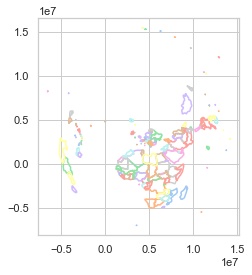

In [47]:
# see tutorial https://chrishavlin.com/2016/11/16/shapefiles-tutorial/

plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
            
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

plt.plot(x_lon,y_lat)



In [25]:
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

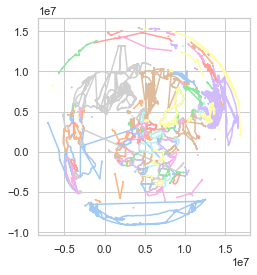

In [28]:
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(sf.iterShapes()):
   x_lon = np.zeros((len(shape.points),1))
   y_lat = np.zeros((len(shape.points),1))
   for ip in range(len(shape.points)):
       x_lon[ip] = shape.points[ip][0]
       y_lat[ip] = shape.points[ip][1]

   plt.plot(x_lon,y_lat)

plt.show()

 

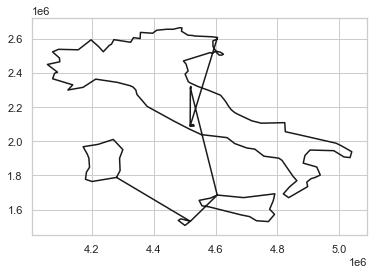

In [26]:
plt.plot(x_lon,y_lat,'k')


##### 1.2 - Import CSV file to pandas DataFrame

In [2]:
df = pd.read_csv('./data/avocado_df.csv', index_col=0)

display(df.head())

,region,AveragePrice,Total Volume,latitude,longitude,geometry
0,Albany,1.561036,47537.86973,42.651550,-73.755211,POINT (-73.75521087646484 42.65155029296875)
1,Atlanta,1.337959,262145.32200,33.748310,-84.391113,POINT (-84.39111328125 33.74831008911133)
2,BaltimoreWashington,1.534231,398561.89150,39.183739,-76.674210,POINT (-76.67420959472656 39.18373870849609)
3,Boise,1.348136,42642.56731,43.607639,-116.193398,POINT (-116.1933975219727 43.60763931274414)
4,Boston,1.530888,287792.85450,42.358662,-71.056740,POINT (-71.05673980712891 42.35866165161133)


##### 1.3 - Create Coordinate Transform Function

For this particular visualisation, we will need to convert our latitudes and longitudes into Mercator coordinates. To do this we will use a function ('borrowed' from my friend [Nadine Amersi-Belton](https://github.com/nadinezab/kc-house-prices-prediction)) to perform this transformation.

In [3]:
# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)

# Define coord as tuple (lat,long)
df['coordinates'] = list(zip(df['latitude'], df['longitude']))


# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in df['coordinates'] ]


##### 1.4 - Add Mercator Coordinates to DataFrame

Now we will add those coordinates to our DataFrame.

In [4]:
# Create mercator column in our df
df['mercator'] = mercators

# Split that column out into two separate cols - mercator_x and mercator_y
df[['mercator_x', 'mercator_y']] = df['mercator'].apply(pd.Series)

# Drop 'geometry' column 
df = df.drop(columns=['geometry'])

# Examine our modified DataFrame
df.head()


,region,AveragePrice,Total Volume,latitude,longitude,coordinates,mercator,mercator_x,mercator_y
0,Albany,1.561036,47537.86973,42.651550,-73.755211,"(42.65155029, -73.75521088)","(-8210392.518512112, 5259083.750058974)",-8.210393e+06,5.259084e+06
1,Atlanta,1.337959,262145.32200,33.748310,-84.391113,"(33.74831009, -84.39111328)","(-9394375.757807067, 3995056.081948726)",-9.394376e+06,3.995056e+06
2,BaltimoreWashington,1.534231,398561.89150,39.183739,-76.674210,"(39.18373871, -76.67420959)","(-8535333.968535533, 4748024.844048325)",-8.535334e+06,4.748025e+06
3,Boise,1.348136,42642.56731,43.607639,-116.193398,"(43.60763931, -116.1933975)","(-12934589.843240427, 5404922.878631644)",-1.293459e+07,5.404923e+06
4,Boston,1.530888,287792.85450,42.358662,-71.056740,"(42.35866165, -71.05673981)","(-7910000.093079331, 5214857.553783183)",-7.910000e+06,5.214858e+06


### 2. Create Visualisation with Bokeh

##### 2.1 - Create Visualisation

The steps are described with comments below. Full explanations of each step can be found in the [associated article](https://towardsdatascience.com/creating-an-interactive-map-in-python-using-bokeh-and-pandas-f84414536a06).

This creates a [.html file](./output/avocado.html) which we can embed in dashboards or on [web pages](https://www.craigdoesdata.de/blog/avocadobokeh.html) as we please. The use of the 'show' function at the end also allows the visualisation to be displayed within our notebook.

In [5]:
# Create map with Bokeh

# Select tile set to use
chosentile = get_provider(Vendors.STAMEN_TONER)

# Choose palette
palette = PRGn[11]

# Tell Bokeh to use df as the source of the data
source = ColumnDataSource(data=df)

# Define color mapper - which column will define the colour of the data points
color_mapper = linear_cmap(field_name = 'AveragePrice', palette = palette, low = df['AveragePrice'].min(), high = df['AveragePrice'].max())

# Set tooltips - these appear when we hover over a data point in our map, very nifty and very useful
nan_color = '#d9d9d9'
tooltips = [("Price","@AveragePrice"), ("Region","@region")]


# Create figure
p = figure(title = 'Avocado Prices by region in the United States', x_axis_type="mercator", y_axis_type="mercator", 
           x_axis_label = 'Longitude', y_axis_label = 'Latitude', tooltips = tooltips)

# Add map tile
p.add_tile(chosentile)

# Add points using mercator coordinates
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source, size=30, fill_alpha = 0.7)

#Defines color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                     formatter = NumeralTickFormatter(format='0.0[0000]'), 
                     label_standoff = 13, width=8, location=(0,0))

# Set color_bar location
p.add_layout(color_bar, 'right')

# Display in notebook
output_notebook()

# Save as HTML
output_file('./output/avocado.html', title='Avocado Prices by region in the United States')

# Show map
show(p)



Loading BokehJS ...

FileNotFoundError: [Errno 2] No such file or directory: './output/avocado.html'

---------------------

### 3. Conclusion
##### 3.1 - Conclusion

Now we have produced a working interactive map using Bokeh, which we can embed in our choice of online delivery system for our users / stakeholders. They are then free to examine the visualisation as they choose. 

